# Project Proposal and Data Selection/Preparation

## Milestone 1
This notebook refers to the first week of the final project of the Learn SQL Basics for Data Science Specialization.

### Project guideline - week 01.

You are a data scientist working for a data analytics company. Your company has explored a multitude of data sources and is tasked with providing key insights that your customers can make actionable. Your manager has asked you to provide some data analysis guidance for one of the company's customers.

In a typical scenario, you would iteratively work with your client to understand the data wanting to be analyzed.  Having a solid understanding of the data and any underlying assumptions present is crucial to the success of a data analysis project.  However, in this case, you will need to do a little more of the “heavy lifting”.

#### Which client/dataset did you select and why?

Client 3: SportsStats (Olympics Dataset - 120 years of data) SportsStats is a sports analysis firm partnering with local news and elite personal trainers to provide “interesting” insights to help their partners. Insights could be patterns/trends highlighting certain groups/events/countries, etc. for the purpose of developing a news story or discovering key health insights.

#### Proposal.
Identify the difference in performance between athletes, and which countries have the best performance.

**I selected Sports Stats client, datasets for following reasons:**
1. Identify the difference in performance between athletes, and which countries have the best performance.
2. I am interested in sports and working with sports analytics
3. Which countries have more representation, and how was the evolution of its representation
4. Which countries have the best performance in the games.

### The steps you took to import and clean the data.

To import the data, I used pandas to read the CSV files.To perform the cleanup I removed duplicate values, to understand the number of athletes involved in the games, and also some of the empty values.

In [1]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install import_ipynb

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pysqldf = lambda q: sqldf(q, globals())
from pandasql import sqldf

#### Reading all CSV files with Pandas

In [4]:
athelete_events_df = pd.read_csv("athlete_events.csv")
noc_regions_df = pd.read_csv("noc_regions.csv")

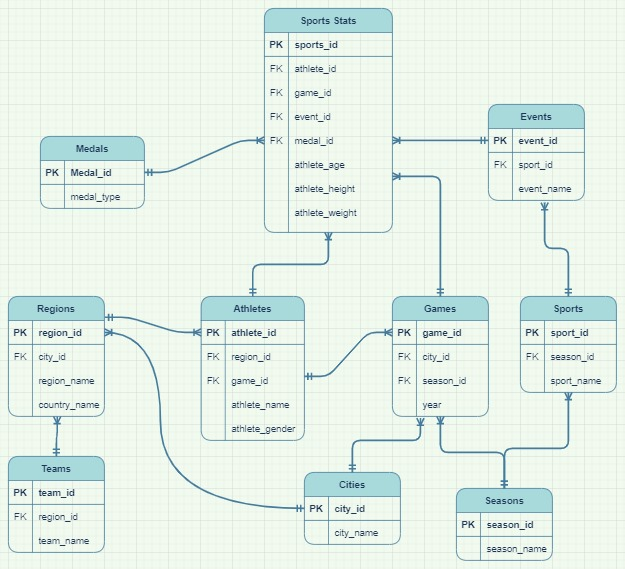

In [5]:
athelete_events_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
noc_regions_df

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [7]:
# The drop_duplicates() method in Pandas is used to remove duplicate rows from a dataframe. 
athelete_events_df.drop_duplicates(inplace=True)

In [8]:
# summary statistics for each numerical column in a dataframe athelete_events_df, we can use the describe() function:
athelete_events_df.describe()

,ID,Age,Height,Weight,Year
count,269731.000000,260416.000000,210917.000000,208204.000000,269731.000000
mean,68264.949591,25.454776,175.338953,70.701778,1978.623073
std,39026.253843,6.163869,10.518507,14.349027,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,21.000000,168.000000,60.000000,1960.000000
50%,68233.000000,24.000000,175.000000,70.000000,1988.000000
75%,102111.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
# I want to know how many unique atheletes we have of each Seasons.
athelete_events_df.groupby("Season").count()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
Season,,,,,,,,,,,,,,
Summer,221167,221167,221167,212137,170667,168661,221167,221167,221167,221167,221167,221167,221167,34077
Winter,48564,48564,48564,48279,40250,39543,48564,48564,48564,48564,48564,48564,48564,5695


In [10]:
# The unique atheletes we have of each Seasons team.
athelete_events_df.groupby("Team").count()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
Team,,,,,,,,,,,,,,
30. Februar,2,2,2,2,2,1,2,2,2,2,2,2,2,0
A North American Team,4,4,4,3,0,0,4,4,4,4,4,4,4,4
Acipactli,3,3,3,3,3,3,3,3,3,3,3,3,3,0
Acturus,2,2,2,1,0,0,2,2,2,2,2,2,2,0
Afghanistan,126,126,126,78,54,61,126,126,126,126,126,126,126,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zambia,183,183,183,154,128,139,183,183,183,183,183,183,183,2
Zefyros,2,2,2,2,2,2,2,2,2,2,2,2,2,0
Zimbabwe,309,309,309,307,286,287,309,309,309,309,309,309,309,22


In [11]:
# I want to know how many athletes we have of each gender.
grouped = athelete_events_df.groupby(athelete_events_df["Sex"])
print("Male athletes")
print(grouped.get_group("M").nunique())
print("---")
print("Female athletes")
print(grouped.get_group("F").nunique())

Male athletes
ID        101590
Name      100979
Sex            1
Age           74
Height        92
Weight       206
Team        1154
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         63
Event        554
Medal          3
dtype: int64
---
Female athletes
ID        33981
Name      33808
Sex           1
Age          62
Height       77
Weight      140
Team        374
NOC         222
Games        50
Year         34
Season        2
City         42
Sport        53
Event       269
Medal         3
dtype: int64


In [12]:
athelete_events_df.isna().sum().sum()

359615

In [13]:
# Create a list of column names to be dropped
columns_to_drop = ["ID", "Name", "Age", "Height", "Weight", "Team", "NOC", "Games", "Year", "Season", "City", "Sport", "Event"]

# Drop the specified columns from the original DataFrame
gender_df = athelete_events_df.drop(columns_to_drop, axis='columns')

# Remove any rows with missing values (i.e., NaN) from the resulting DataFrame
gender_df = gender_df.dropna()

In [14]:
gender_df

,Sex,Medal
3,M,Gold
37,M,Bronze
38,M,Bronze
40,M,Bronze
41,M,Bronze
...,...,...
271078,F,Silver
271080,F,Bronze
271082,M,Bronze
271102,F,Bronze


In [15]:
# I want to know how many unique athletes we have of each gender.
gender_df.groupby("Sex").count()

,Medal
Sex,
F,11253
M,28519


In [16]:
# I want to know the athletes medal count.
gender_df.groupby("Medal").count()

,Sex
Medal,
Bronze,13295
Gold,13369
Silver,13108


In [17]:
# Differentiate between summer and winter games.
grouped = athelete_events_df.groupby(athelete_events_df["Season"])
print("Summer games")
print(grouped.get_group("Summer").nunique())
print("---")
print("Winter games")
print(grouped.get_group("Winter").nunique())

Summer games
ID        116776
Name      116122
Sex            2
Age           74
Height        95
Weight       219
Team        1157
NOC          230
Games         29
Year          29
Season         1
City          23
Sport         52
Event        651
Medal          3
dtype: int64
---
Winter games
ID        18958
Name      18923
Sex           2
Age          47
Height       64
Weight      125
Team        221
NOC         119
Games        22
Year         22
Season        1
City         19
Sport        17
Event       119
Medal         3
dtype: int64
